# <img src="Election1.png?raw=true" width="400" height="360" />
<h3 align="center"><font-size="20">Exploratory Data Analysis of 2014 Lok Sabha Election Result</h3></font>

# Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Preprocessing](#section303)
    - 3.4 [Post Pandas Profiling](#section304)
4. [Questions](#section4)
    - 4.1 [Sex Categorywise candidates count ?](#section401)<br/>
    - 4.2 [Sex Categorywise Statewise candidates count ?](#section402)<br/>
    - 4.3 [What is Age of Candidates Male, Female & Others ?](#section403)<br/>
    - 4.4 [What is the rate of Election Result of males & females on the basis of selected political parties?](#section404)<br/>
    - 4.5 [How many seats major parites win ?](#section405)<br/>
    - 4.6 [How many NOTA votes received through EVM & Postal ?](#section406)<br/>
5. [Conclusions](#section5)<br/>  
    

<a id=section1></a>

### 1. Problem Statement

The notebooks explores the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

Exploratory Data Analysis 
Understand the data by EDA and derive simple models with Pandas as baseline. EDA is a critical and first step in analyzing the data and we do this for below reasons :
Finding patterns in Data
Determining relationships in Data
Checking of assumptions
Preliminary selection of appropriate models
Detection of mistakes

### 2. Data Loading and Description

•	The dataset consists of information about 2014 Lok Sabha Election result. This contains constituency wise data including state name, Polling center name, Candidates name, Sex of Candidate, Age,Category, Name of Party, Secured Votes, Total electors.

•	The dataset comprises of 8355 records for all seats with below . Below is a table showing names of all the columns and their description.


| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| State Name    | Name of  State                                            | 
| PC Name       | Polling Center Name                                       |  
| Candidate Name| Name of Candidate                                         | 
| Sex           | Sex of Candidate                                          |   
| Age           | Age of Candidate                                          |
| Category      | Category of Candidate                                     |
| Party Name    | Name of Election                                          |
| Votes General | Secured Votes of General                                  |
| Votes Postal  | Secured Votes of Postal                                   |
| Total Electors| Total Electors                                            |
| Result        | Result of Election of Polling Center                      |

#### Some Background Information :

The elections were conducted in 9 phases from __7 April 2014 to 12 May 2014__ by the Election Commission of India. The results of the election were declared on 16 May 2014. __The Bharatiya Janata Party (of the NDA)__ achieved an absolute majority with __282__ seats out of __543__, 166 more than previous 15th Lok Sabha.


#### Importing packages  

In [104]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

#### Importing the Dataset

In [105]:
election_data = pd.read_csv("https://raw.githubusercontent.com/utkarsh1977/EDA_2014_Election_Results/master/Constituency_wise_detailed_result3.csv") 
election_data


,State_Name,PC NAME,CANDIDATES_NAME,SEX,AGE,CATEGORY,PARTY_NAME,PARTY_SYMBOL,GENERAL,POSTAL,Total_Electors,Result
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,1386282,1
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,1386282,0
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,1386282,0
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,1386282,0
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,1386282,0
5,Andhra Pradesh,Adilabad,PAWAR KRISHNA,M,33.0,ST,IND,Bat,5051,4,1386282,0
6,Andhra Pradesh,Adilabad,BANKA SAHADEV,M,53.0,ST,IND,Gas Cylinder,4780,7,1386282,0
7,Andhra Pradesh,Adilabad,MOSALI CHINNAIAH,M,40.0,ST,IND,Almirah,8842,17,1386282,0
8,Andhra Pradesh,Adilabad,None of the Above,NaN,NaN,NaN,NOTA,NOTA,17021,63,1386282,0
9,Andhra Pradesh,Peddapalle,DR.JANAPATI SARAT BABU,M,42.0,SC,TDP,Bicycle,63174,160,1425355,0


## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [106]:
election_data.shape

(8355, 12)

2014 Election Result_data has __8355 rows__ and __14 columns.__

In [107]:
election_data.columns                                               # This will print name of all columns

Index(['State_Name', 'PC NAME', 'CANDIDATES_NAME', 'SEX', 'AGE', 'CATEGORY',
       'PARTY_NAME', 'PARTY_SYMBOL', 'GENERAL', 'POSTAL', 'Total_Electors',
       'Result'],
      dtype='object')

In [108]:
election_data.head()

,State_Name,PC NAME,CANDIDATES_NAME,SEX,AGE,CATEGORY,PARTY_NAME,PARTY_SYMBOL,GENERAL,POSTAL,Total_Electors,Result
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,1386282,1
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,1386282,0
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,1386282,0
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,1386282,0
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,1386282,0


In [109]:
election_data.tail()

,State_Name,PC NAME,CANDIDATES_NAME,SEX,AGE,CATEGORY,PARTY_NAME,PARTY_SYMBOL,GENERAL,POSTAL,Total_Electors,Result
8350,Puducherry,Puducherry,PUVALA NAGESWARA RAO,M,60.0,GEN,IND,Sewing Machine,465,0,901357,0
8351,Puducherry,Puducherry,K. MANJINI,M,41.0,GEN,IND,Coconut,767,0,901357,0
8352,Puducherry,Puducherry,R. VALAVAN,M,40.0,GEN,IND,Carrom Board,497,0,901357,0
8353,Puducherry,Puducherry,V. VIJAYA,F,29.0,GEN,IND,Green Chilli,746,0,901357,0
8354,Puducherry,Puducherry,None of the Above,NaN,NaN,NaN,NOTA,NOTA,22267,1,901357,0


In [110]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8355 entries, 0 to 8354
Data columns (total 12 columns):
State_Name         8355 non-null object
PC NAME            8355 non-null object
CANDIDATES_NAME    8355 non-null object
SEX                7845 non-null object
AGE                7845 non-null float64
CATEGORY           7845 non-null object
PARTY_NAME         8355 non-null object
PARTY_SYMBOL       8355 non-null object
GENERAL            8355 non-null int64
POSTAL             8355 non-null int64
Total_Electors     8355 non-null int64
Result             8355 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 783.4+ KB


In [111]:
election_data.describe()

,AGE,GENERAL,POSTAL,Total_Electors,Result
count,7845.000000,8355.000000,8355.000000,8.355000e+03,8355.000000
mean,47.135883,62132.985398,107.407660,1.574132e+06,0.060802
std,11.902487,140261.650370,436.090305,2.711797e+05,0.238981
min,25.000000,105.000000,0.000000,4.992200e+04,0.000000
25%,38.000000,1708.000000,0.000000,1.446478e+06,0.000000
50%,46.000000,4350.000000,1.000000,1.578125e+06,0.000000
75%,56.000000,14881.000000,13.000000,1.718414e+06,0.000000
max,93.000000,859973.000000,6792.000000,3.183083e+06,1.000000


In [112]:
election_data.isnull().sum()

State_Name           0
PC NAME              0
CANDIDATES_NAME      0
SEX                510
AGE                510
CATEGORY           510
PARTY_NAME           0
PARTY_SYMBOL         0
GENERAL              0
POSTAL               0
Total_Electors       0
Result               0
dtype: int64

From the above output we can see that __Sex, Age__ and __Category__ columns contains null values. We will see how to deal with them.

### 3.2 Pre Profiling

- By pandas profiling, an interactive HTML report gets generated which contins all the information about the columns of the dataset, like the counts and type of each column. Detailed information about each column, coorelation between different columns and a sample of dataset.
- It gives us visual interpretation of each column in the data.
- Spread of the data can be better understood by the distribution plot.
- Grannular level analysis of each column.

In [113]:
profile = pandas_profiling.ProfileReport(election_data)
profile.to_file(outputfile="election_data_before_preprocessing.html")

### 3.3 Preprocessing

In [114]:
party_name_nota=election_data[election_data.PARTY_NAME=='NOTA']
party_name_nota.shape
party_name_nota

,State_Name,PC NAME,CANDIDATES_NAME,SEX,AGE,CATEGORY,PARTY_NAME,PARTY_SYMBOL,GENERAL,POSTAL,Total_Electors,Result
8,Andhra Pradesh,Adilabad,None of the Above,NaN,NaN,NaN,NOTA,NOTA,17021,63,1386282,0
26,Andhra Pradesh,Peddapalle,None of the Above,NaN,NaN,NaN,NOTA,NOTA,5344,17,1425355,0
44,Andhra Pradesh,Karimnagar,None of the Above,NaN,NaN,NaN,NOTA,NOTA,5722,12,1550810,0
61,Andhra Pradesh,Nizamabad,None of the Above,NaN,NaN,NaN,NOTA,NOTA,7244,22,1496193,0
72,Andhra Pradesh,Zahirabad,None of the Above,NaN,NaN,NaN,NOTA,NOTA,11157,33,1445354,0
86,Andhra Pradesh,Medak,None of the Above,NaN,NaN,NaN,NOTA,NOTA,10687,9,1536166,0
117,Andhra Pradesh,Malkajgiri,None of the Above,NaN,NaN,NaN,NOTA,NOTA,8666,26,3183083,0
148,Andhra Pradesh,Secundrabad,None of the Above,NaN,NaN,NaN,NOTA,NOTA,6567,5,1893741,0
165,Andhra Pradesh,Hyderabad,None of the Above,NaN,NaN,NaN,NOTA,NOTA,5011,2,1823217,0
181,Andhra Pradesh,CHELVELLA,None of the Above,NaN,NaN,NaN,NOTA,NOTA,9989,29,2185164,0


In [115]:
sex_null_cnt=sum(pd.isnull(election_data['SEX']))
print("NULL SEX count is :",sex_null_cnt)

NULL SEX count is : 510


In [116]:
def label_race (row):
    if row['State_Name'] == 'Andhra Pradesh'  :
      return 'AP'
    if row['State_Name'] == 'Gujarat':
      return 'GJ'
    if row['State_Name'] == 'Arunachal Pradesh' :
        return 'AR'
    if row['State_Name'] == 'Assam' :
        return 'AS'
    if row['State_Name'] == 'Bihar' :
        return 'BH'
    if row['State_Name'] == 'Goa' :
        return 'GA'
    if row['State_Name'] == 'Haryana' :
        return 'HR'
    if row['State_Name'] == 'Himachal Pradesh' :
        return 'HP'
    if row['State_Name'] == 'Jammu & Kashmir' :
        return 'JK'
    if row['State_Name'] == 'Karnataka' :
        return 'KR'
    if row['State_Name'] == 'Kerala' :
        return 'KE'
    if row['State_Name'] == 'Madhya Pradesh' :
        return 'MP'
    if row['State_Name'] == 'Maharashtra' :
        return 'MH'
    if row['State_Name'] == 'Manipur' :
        return 'MN'
    if row['State_Name'] == 'Meghalaya' :
        return 'MG'
    if row['State_Name'] == 'Mizoram' :
        return 'MI'
    if row['State_Name'] == 'Nagaland' :
        return 'NG'
    if row['State_Name'] == 'Punjab' :
        return 'PB'
    if row['State_Name'] == 'Rajasthan' :
        return 'RJ'
    if row['State_Name'] == 'Sikkim' :
        return 'SK'
    if row['State_Name'] == 'Tamil Nadu' :
        return 'TN'
    if row['State_Name'] == 'Tripura' :
        return 'TR'
    if row['State_Name'] == 'Uttar Pradesh' :
        return 'UP'
    if row['State_Name'] == 'West Bengal' :
        return 'WB'
    if row['State_Name'] == 'Jharkhand' :
        return 'JH'
    if row['State_Name'] == 'Uttarakhand' :
        return 'UT'
    if row['State_Name'] == 'Andaman & Nicobar Islands' :
        return 'AN'
    if row['State_Name'] == 'Chandigarh' :
        return 'CH'
    if row['State_Name'] == 'Dadra & Nagar Haveli' :
        return 'DN'
    if row['State_Name'] == 'Daman & Diu' :
        return 'DD'
    if row['State_Name'] == 'NCT OF Delhi' :
        return 'DL'
    if row['State_Name'] == 'Lakshadweep' :
        return 'LD'
    if row['State_Name'] == 'Puducherry' :
        return 'PU'
    
election_data['State_Name_Short']=election_data.apply (lambda row: label_race (row),axis = 1)
election_data

,State_Name,PC NAME,CANDIDATES_NAME,SEX,AGE,CATEGORY,PARTY_NAME,PARTY_SYMBOL,GENERAL,POSTAL,Total_Electors,Result,State_Name_Short
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,1386282,1,AP
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,1386282,0,AP
2,Andhra Pradesh,Adilabad,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,1386282,0,AP
3,Andhra Pradesh,Adilabad,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,1386282,0,AP
4,Andhra Pradesh,Adilabad,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,1386282,0,AP
5,Andhra Pradesh,Adilabad,PAWAR KRISHNA,M,33.0,ST,IND,Bat,5051,4,1386282,0,AP
6,Andhra Pradesh,Adilabad,BANKA SAHADEV,M,53.0,ST,IND,Gas Cylinder,4780,7,1386282,0,AP
7,Andhra Pradesh,Adilabad,MOSALI CHINNAIAH,M,40.0,ST,IND,Almirah,8842,17,1386282,0,AP
8,Andhra Pradesh,Adilabad,None of the Above,NaN,NaN,NaN,NOTA,NOTA,17021,63,1386282,0,AP
9,Andhra Pradesh,Peddapalle,DR.JANAPATI SARAT BABU,M,42.0,SC,TDP,Bicycle,63174,160,1425355,0,AP


In [117]:
# Remove NULL rows from dataset and created new dataset new_election_data
new_election_data=election_data.dropna()
new_election_data.isnull().sum()
new_election_data.shape

(7844, 13)

## 3.4 Post Pandas Profiling

In [118]:
import pandas_profiling
import sys
#!conda install --yes --prefix {sys.prefix} pandas-profiling
profile = pandas_profiling.ProfileReport(new_election_data)
profile.to_file(outputfile="Election_data_after_preprocessing_new1.html")

Now we have preprocessed the data, now the dataset doesn't contain missing values, we have also introduced new column named State Short Name. So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e election_data_after_preprocessing.html and election_data_before_preprocessing.html.
In election_data_after_preprocessing.html report, observations:

In the Dataset info, Total Missing(%) = 0.0%
Number of variables = 13
Observe the newly created variable State_Name_Short to shorten state name, Click on Toggle details to get more detailed information about it.

### 4. Questions

### 4.1 Sex Categorywise candidates count ?

Text(0.5,1,'Sexwise Candidates')

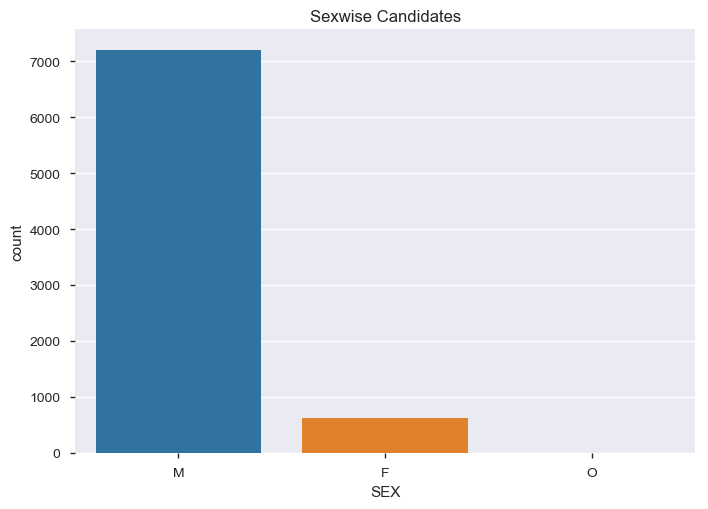

In [119]:
sns.countplot(x='SEX', data=new_election_data).set_title('Sexwise Candidates')

You can see __count of Candidates__ of all parties in __all states__ using __Group by__

In [120]:
new_election_data.groupby(['SEX'])['SEX'].count()

SEX
F     630
M    7208
O       6
Name: SEX, dtype: int64

### 4.2 Sex Categorywise Statewise candidates count ?

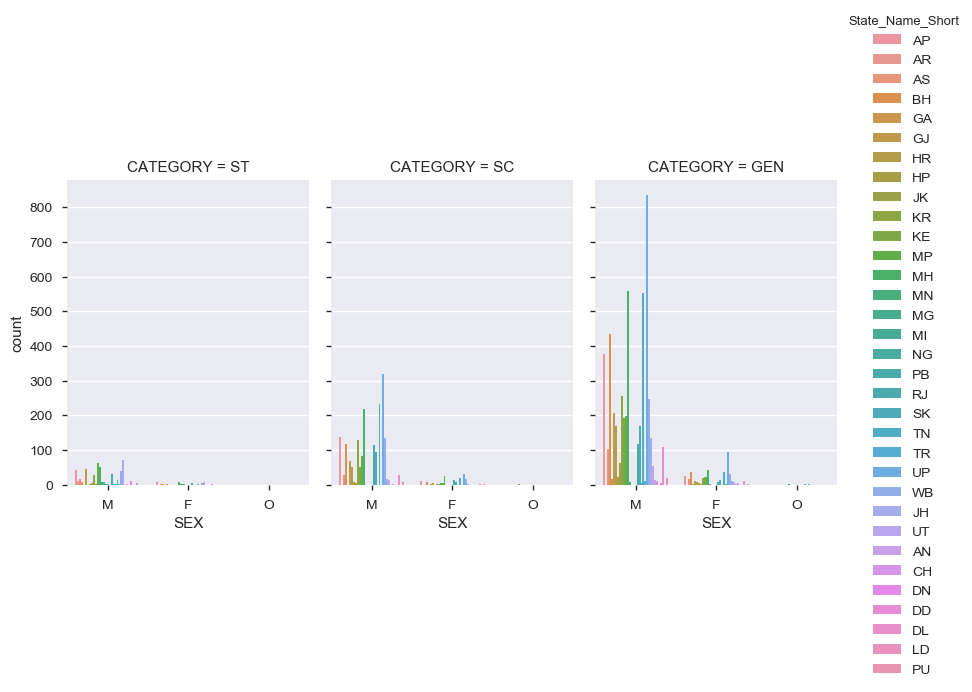

In [121]:
sns.catplot(x='SEX',hue='State_Name_Short',col="CATEGORY",data=new_election_data,kind="count",height=4, aspect=.7)

### 4.3 What is Age of Candidates Male, Female & Others ?

C:\Users\utkarsh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Age distribution using FacetGrid')

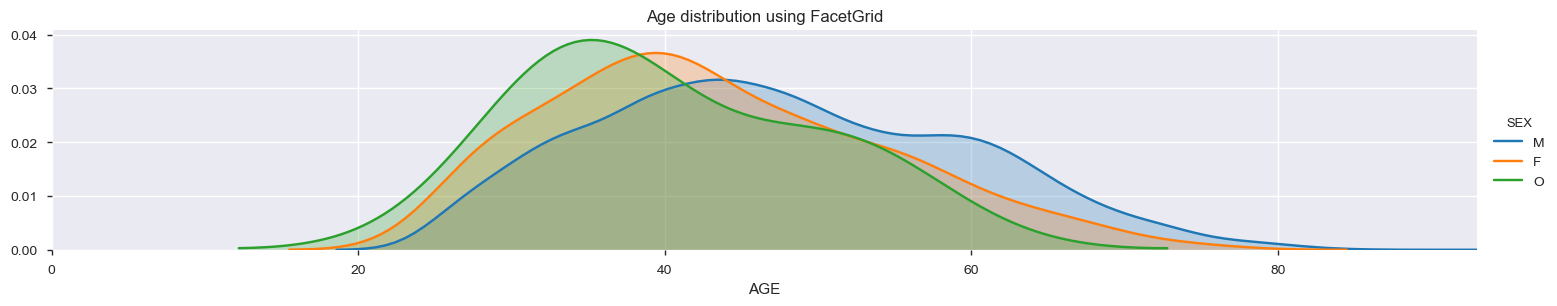

In [122]:
as_fig = sns.FacetGrid(new_election_data,hue='SEX',aspect=5)

as_fig.map(sns.kdeplot,'AGE',shade=True)

oldest = new_election_data['AGE'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()
plt.title('Age distribution using FacetGrid')

- Majority of Age of Male candidates were between 25 to 75
- Majority of Age of Female candidates were between 25 to 55
- Majority of Age of Other candidates were between 30 to 55

In [123]:
new_election_data.groupby(['SEX','AGE'])['SEX'].count()

SEX  AGE 
F    25.0      9
     26.0      9
     27.0     11
     28.0     19
     29.0     14
     30.0     19
     31.0      9
     32.0     16
     33.0     21
     34.0     17
     35.0     21
     36.0     21
     37.0     18
     38.0     31
     39.0     30
     40.0     17
     41.0     26
     42.0     26
     43.0     25
     44.0     18
     45.0     15
     46.0     11
     47.0     21
     48.0     14
     49.0     22
     50.0     14
     51.0     13
     52.0     10
     53.0      8
     54.0     14
            ... 
M    63.0    131
     64.0    110
     65.0     94
     66.0     87
     67.0     72
     68.0     57
     69.0     59
     70.0     50
     71.0     25
     72.0     46
     73.0     39
     74.0     24
     75.0     11
     76.0     12
     77.0     16
     78.0     11
     79.0      9
     80.0     11
     81.0      4
     82.0      4
     83.0      1
     84.0      1
     86.0      1
     93.0      1
O    32.0      1
     34.0      1
     35.0      1
    

In [124]:
Total_Valid_Votes=(new_election_data[new_election_data.SEX == 'M']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'M']['POSTAL'].sum()) + (new_election_data[new_election_data.SEX == 'F']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'F']['POSTAL'].sum()) + (new_election_data[new_election_data.SEX == 'O']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'O']['POSTAL'].sum())
#Total_Valid_Votes
print("% of Male Candidates Valid Votes : " , (new_election_data[new_election_data.SEX == 'M']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'M']['POSTAL'].sum()) / (new_election_data[new_election_data.SEX == 'M']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'M']['POSTAL'].sum() + new_election_data[new_election_data.SEX == 'F']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'F']['POSTAL'].sum() + new_election_data[new_election_data.SEX == 'O']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'O']['POSTAL'].sum()))
print("% of Female Candidates Valid Votes : " , (new_election_data[new_election_data.SEX == 'F']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'F']['POSTAL'].sum()) / (new_election_data[new_election_data.SEX == 'M']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'M']['POSTAL'].sum() + new_election_data[new_election_data.SEX == 'F']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'F']['POSTAL'].sum() + new_election_data[new_election_data.SEX == 'O']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'O']['POSTAL'].sum()))
print("% of Other Candidates Valid Votes : " , (new_election_data[new_election_data.SEX == 'O']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'O']['POSTAL'].sum()) / (new_election_data[new_election_data.SEX == 'M']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'M']['POSTAL'].sum() + new_election_data[new_election_data.SEX == 'F']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'F']['POSTAL'].sum() + new_election_data[new_election_data.SEX == 'O']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'O']['POSTAL'].sum()))

% of Male Candidates Valid Votes :  0.8868010122960213
% of Female Candidates Valid Votes :  0.1131697012971315
% of Other Candidates Valid Votes :  2.9286406847187573e-05


### Using Pie Plot

Text(0.5,1,'Valid votes (Others)')

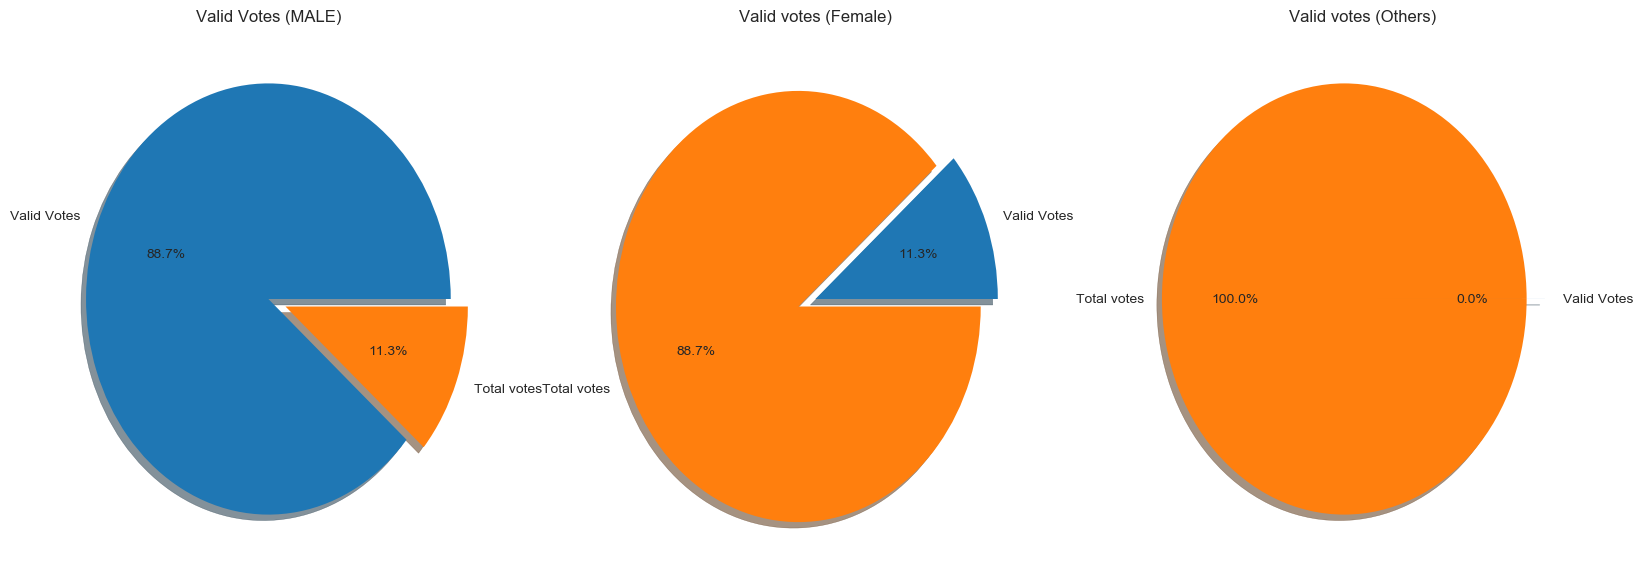

In [125]:
import matplotlib.pyplot as plt
f,ax = plt.subplots(1,3,figsize=(20,7))
labels = 'Valid Votes','Total votes'
M_votes=(new_election_data[new_election_data.SEX == 'M']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'M']['POSTAL'].sum()) / (new_election_data[new_election_data.SEX == 'M']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'M']['POSTAL'].sum() + new_election_data[new_election_data.SEX == 'F']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'F']['POSTAL'].sum() + new_election_data[new_election_data.SEX == 'O']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'O']['POSTAL'].sum())
F_votes=(new_election_data[new_election_data.SEX == 'F']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'F']['POSTAL'].sum()) / (new_election_data[new_election_data.SEX == 'M']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'M']['POSTAL'].sum() + new_election_data[new_election_data.SEX == 'F']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'F']['POSTAL'].sum() + new_election_data[new_election_data.SEX == 'O']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'O']['POSTAL'].sum())
O_votes=(new_election_data[new_election_data.SEX == 'O']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'O']['POSTAL'].sum()) / (new_election_data[new_election_data.SEX == 'M']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'M']['POSTAL'].sum() + new_election_data[new_election_data.SEX == 'F']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'F']['POSTAL'].sum() + new_election_data[new_election_data.SEX == 'O']['GENERAL'].sum()+ new_election_data[new_election_data.SEX == 'O']['POSTAL'].sum())
sizes_m=[M_votes,1-M_votes]
sizes_f=[F_votes,1-F_votes]
sizes_o=[O_votes,1-O_votes]
explode = (0, 0.1)
ax[0].pie(sizes_m, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True)
ax[1].pie(sizes_f, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True)
ax[2].pie(sizes_o, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True)

ax[0].set_title('Valid Votes (MALE)')
ax[1].set_title('Valid votes (Female)')
ax[2].set_title('Valid votes (Others)')

- __86.7%__ valid votes are given to __Male__ candidates
- __11.3%__ valid votes are given to __Female__ candidates
- Almost __0.0%__ valid votes are given to __Others__ candiates

In [126]:
new_election_data['Result'][new_election_data['SEX'] == 'M'].value_counts()

0    6759
1     449
Name: Result, dtype: int64

In [127]:
new_election_data['Result'][new_election_data['SEX'] == 'F'].value_counts()

0    571
1     59
Name: Result, dtype: int64

In [128]:
new_election_data['Result'][new_election_data['SEX'] == 'O'].value_counts()

0    6
Name: Result, dtype: int64

In [129]:
new_election_data['Result'].value_counts()

0    7336
1     508
Name: Result, dtype: int64

 Using __donut pie chart__ to see the relationship between __Elected & Not Elected__ and __Gender__

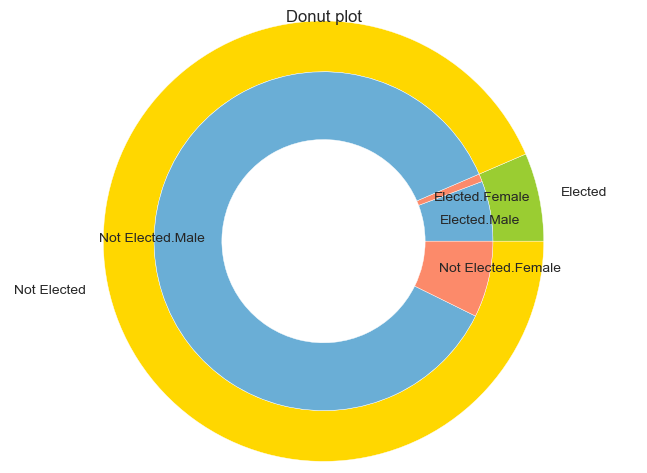

In [130]:
import matplotlib.pyplot as plt
 
# Make data: 
group_names=['Elected', 'Not Elected']
group_size=[508,7336]
subgroup_names=['Elected.Male','Elected.Female','Not Elected.Male','Not Elected.Female']
subgroup_size=[449,59,6759,571]
 
# Create colors
a, b, c=[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors = ['yellowgreen', 'gold'])
plt.setp( mypie, width=0.3, edgecolor='white')

# wedges, texts, autotexts = ax.pie(group_size, autopct=lambda pct: func(pct, data),
                                  #textprops=dict(color="w"))
 
# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), b(0.4), a(0.5), b(0.4)])
plt.setp( mypie2, width=0.4, edgecolor='white')
plt.margins(0,0)
plt.title('Donut plot')
# show it
plt.show()


### 4.4. What is the rate of Election Result of males & females on the basis of selected political parties?

- Using mathematical function

In [131]:
print("% of Elected Candidates of Top 7 parties") 
print("Party Name = BJP : ", new_election_data.Result[new_election_data.PARTY_NAME == 'BJP'].sum()/new_election_data[new_election_data.PARTY_NAME == 'BJP'].Result.count())
print("Party Name = INC : ", new_election_data.Result[new_election_data.PARTY_NAME == 'INC'].sum()/new_election_data[new_election_data.PARTY_NAME == 'INC'].Result.count())
print("Party Name = ADMK : ", new_election_data.Result[new_election_data.PARTY_NAME == 'ADMK'].sum()/new_election_data[new_election_data.PARTY_NAME == 'ADMK'].Result.count())
print("Party Name = ATTC : ", new_election_data.Result[new_election_data.PARTY_NAME == 'ATTC'].sum()/new_election_data[new_election_data.PARTY_NAME == 'AITC'].Result.count())
print("Party Name = SHS : ", new_election_data.Result[new_election_data.PARTY_NAME == 'SHS'].sum()/new_election_data[new_election_data.PARTY_NAME == 'SHS'].Result.count())
print("Party Name = TDP : ", new_election_data.Result[new_election_data.PARTY_NAME == 'TDP'].sum()/new_election_data[new_election_data.PARTY_NAME == 'TDP'].Result.count())
print("Party Name = TRS : ", new_election_data.Result[new_election_data.PARTY_NAME == 'TRS'].sum()/new_election_data[new_election_data.PARTY_NAME == 'TRS'].Result.count())

% of Elected Candidates of Top 7 parties
Party Name = BJP :  0.6742424242424242
Party Name = INC :  0.09953703703703703
Party Name = ADMK :  0.925
Party Name = ATTC :  0.0
Party Name = SHS :  0.3103448275862069
Party Name = TDP :  0.5333333333333333
Party Name = TRS :  0.6470588235294118


- Using crosstab function

In [132]:
TOP_PARTIES=new_election_data[(new_election_data.PARTY_NAME == 'BJP') | (new_election_data.PARTY_NAME == 'INC') | (new_election_data.PARTY_NAME == 'ADMK')|(new_election_data.PARTY_NAME == 'AITC')|(new_election_data.PARTY_NAME == 'SHS')| (new_election_data.PARTY_NAME == 'TDP')| (new_election_data.PARTY_NAME == 'TRS')]
pd.crosstab([TOP_PARTIES.SEX, TOP_PARTIES.Result], TOP_PARTIES.PARTY_NAME, margins=True).apply(lambda r: 100*r/TOP_PARTIES['PC NAME'].unique().size, axis=1).style.background_gradient(cmap='autumn_r')

- Using __violin plot__ to see the relationship between __Top 7 Parties and Result__

C:\Users\utkarsh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


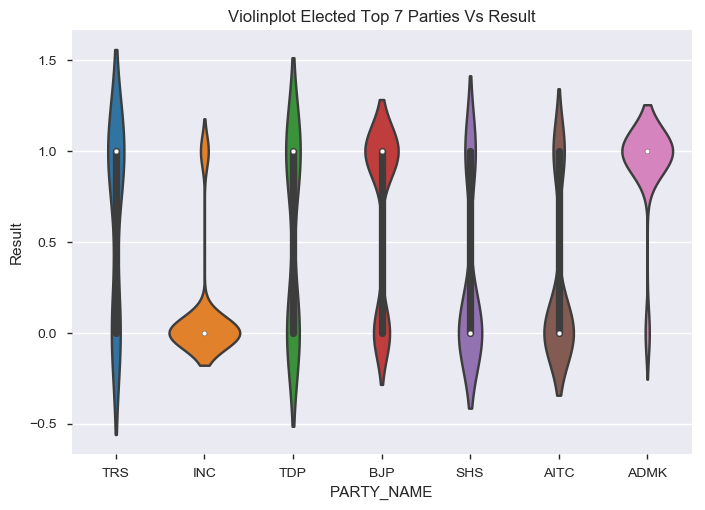

In [136]:
sns.violinplot('PARTY_NAME','Result', kind='point',data=TOP_PARTIES)
plt.title('Violinplot Elected Top 7 Parties Vs Result')
plt.show()

# 4.5 How many seats major parites win?

C:\Users\utkarsh\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5,1,'Factorplot with kind = "count" for Election Result and Name of Top 7 Parties')

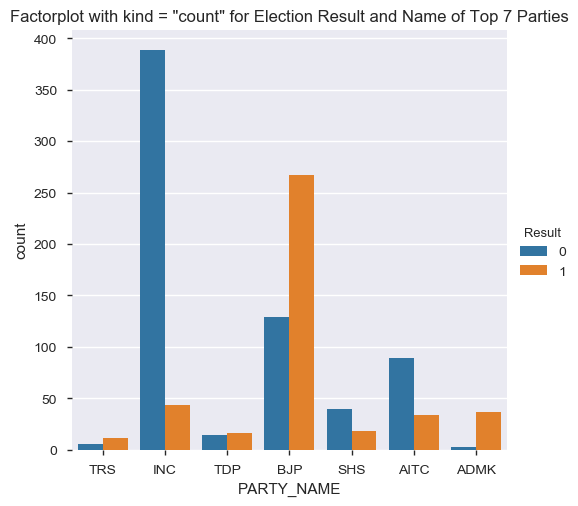

In [134]:
sns.factorplot('PARTY_NAME', data=TOP_PARTIES, hue='Result', kind='count')
plt.title('Factorplot with kind = "count" for Election Result and Name of Top 7 Parties')

- The wining ratio of BJP is higher than all other parites
- The loosing Ration of INC party is higher 

# 4.6 How many NOTA votes received through EVM & Postal?

In [135]:
party_name_nota=election_data[election_data.PARTY_NAME=='NOTA']
party_name_nota.groupby(['GENERAL','POSTAL'])['GENERAL','POSTAL'].sum()
print("NOTA votes throug EVM :", party_name_nota.GENERAL.sum())
print("NOTA votes throug POSTAL :", party_name_nota.POSTAL.sum())


NOTA votes throug EVM : 5436979
NOTA votes throug POSTAL : 8308


## 5. Conclusion 

- With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also we have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- We have also seen how __preproceesing__ helps in dealing with _null_ values and irregualities present in the data. 
- We also make use of __pandas profiling__ feature to generate an html report containing all the information of the various features present in the dataset.
- We have seen the impact of columns like _Sex, PARTY_NAME, Result_ on the rate of election result.